In [1]:
import cv2
import numpy as np
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
import matplotlib.pyplot as plt
from scipy import ndimage

In [2]:
def watersheed(path):
  # Carregando imagem
  imagem = cv2.imread(path)
  image = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
  # Converendo para escala de cinza
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  # Otsu's threshold
  thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

  '''Calcula a distância euclidiana de cada pixel binário 
     para o pixel zero mais próximo e encontre os picos'''
  distance_map = ndimage.distance_transform_edt(thresh)
  local_max = peak_local_max(distance_map, indices=False, min_distance=20, labels=thresh)

  # Execute a análise de componentes e aplica o Watershed
  markers = ndimage.label(local_max, structure=np.ones((3, 3)))[0]
  labels = watershed(-distance_map, markers, mask=thresh)

  total_area = 0
  for label in np.unique(labels):
      if label == 0:
          continue

      mask = np.zeros(gray.shape, dtype="uint8")
      mask[labels == label] = 255

      # Encontrando contornos e determinando a área do contorno
      cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
      cnts = cnts[0] if len(cnts) == 2 else cnts[1]
      c = max(cnts, key=cv2.contourArea)
      area = cv2.contourArea(c)
      total_area += area
      cv2.drawContours(image, [c], -1, (36,255,12), 4)
      
  print(total_area)
  plt.imshow(image)
  plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  del sys.path[0]


21465.5


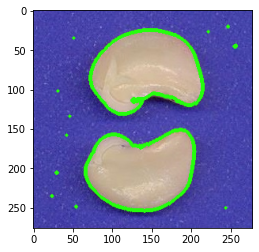

In [3]:
path = '/content/R2_IN.jpg'
watersheed(path)

24135.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  del sys.path[0]


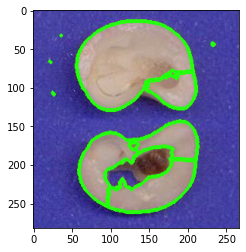

In [4]:
path = '/content/R2_IN2.jpg'
watersheed(path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  del sys.path[0]


23913.5


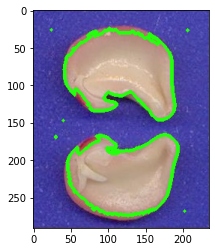

In [5]:
path = '/content/R2_IN3.jpg'
watersheed(path)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: indices argument is deprecated and will be removed in version 0.20. To avoid this warning, please do not use the indices argument. Please see peak_local_max documentation for more details.
  del sys.path[0]


16909.5


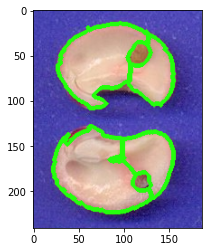

In [6]:
path = '/content/R2_IN4.jpg'
watersheed(path)